# **Salary Prediction Model**

The Salary Dataset  containing the following data:

1. Age

2. Gender

3. Education Level

4. Job Title

5. Years of Experience

7. Salary

### **Import Packages / Libraries :**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

### **Read Data File / CSV File:**

In [2]:
# Importing Data

df = pd.read_csv('Salary_Data.csv')
df.shape

(6704, 6)

In [3]:
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.tail(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [5]:
df.sample(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2547,26.0,Male,Master's Degree,Front end Developer,4.0,75656.0
6170,24.0,Female,High School,Receptionist,0.0,25000.0
4424,32.0,Female,Master's Degree,Marketing Manager,6.0,77000.0
2417,28.0,Female,Master's Degree,Full Stack Engineer,7.0,115920.0
4565,42.0,Female,Master's Degree,Senior Human Resources Manager,13.0,125000.0


In [6]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

#### *Renaming the columns names*

In [7]:
df.columns = ['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience',
       'Salary']

In [8]:
df.dtypes

Age                    float64
Gender                  object
Education_Level         object
Job_Title               object
Years_of_Experience    float64
Salary                 float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education_Level      6701 non-null   object 
 3   Job_Title            6702 non-null   object 
 4   Years_of_Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


#### *Missing / Null value in each columns*

In [10]:
df.isnull().sum()

Age                    2
Gender                 2
Education_Level        3
Job_Title              2
Years_of_Experience    3
Salary                 5
dtype: int64

In [11]:
# Dropping null values from database

df.dropna(inplace=True)

In [12]:
# Checking unique value counts of Job Titles in the database

df['Job_Title'].value_counts()

Job_Title
Software Engineer                     518
Data Scientist                        453
Software Engineer Manager             376
Data Analyst                          363
Senior Project Engineer               318
                                     ... 
Junior Research Scientist               1
Senior Product Development Manager      1
Junior Social Media Specialist          1
Senior Software Architect               1
Social Media Man                        1
Name: count, Length: 191, dtype: int64

In [13]:
# Reducing Job titles by omitting titles with less than 25 counts

job_title_count = df['Job_Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

np.int64(142)

In [14]:
# Omitting titles with less than 25 counts

df['Job_Title'] = df['Job_Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job_Title'].nunique()

50

In [15]:
#Checking unique value count of Education Level

df['Education_Level'].value_counts()

Education_Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [16]:
# Combining repeating values of education level

df['Education_Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education_Level'].value_counts()

Education_Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [17]:
# Checking Unique Value count of Gender

df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

## **Data Exploration and Visualization:**

### *Statistics of Numerical Columns:*

In [18]:
df.describe()

,Age,Years_of_Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


#### **Distribution of Gender and Education Level**

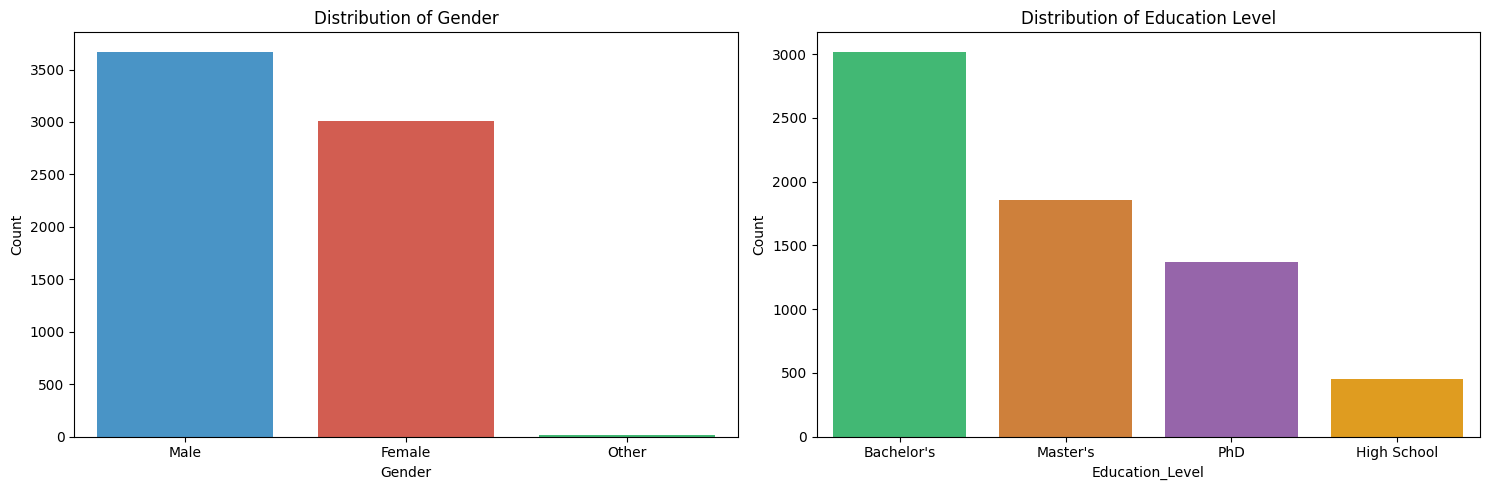

In [19]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

gender_colors = ['#3498db', '#e74c3c', '#2ecc71']
education_colors = ['#2ecc71', '#e67e22', '#9b59b6', 'orange']

sns.countplot(x='Gender', data=df, ax=ax[0], palette=gender_colors)

sns.countplot(x='Education_Level', data=df, ax=ax[1], palette=education_colors)

ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education_Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

plt.tight_layout()
plt.show()

#### **Top 10 Highest Paying Jobs**

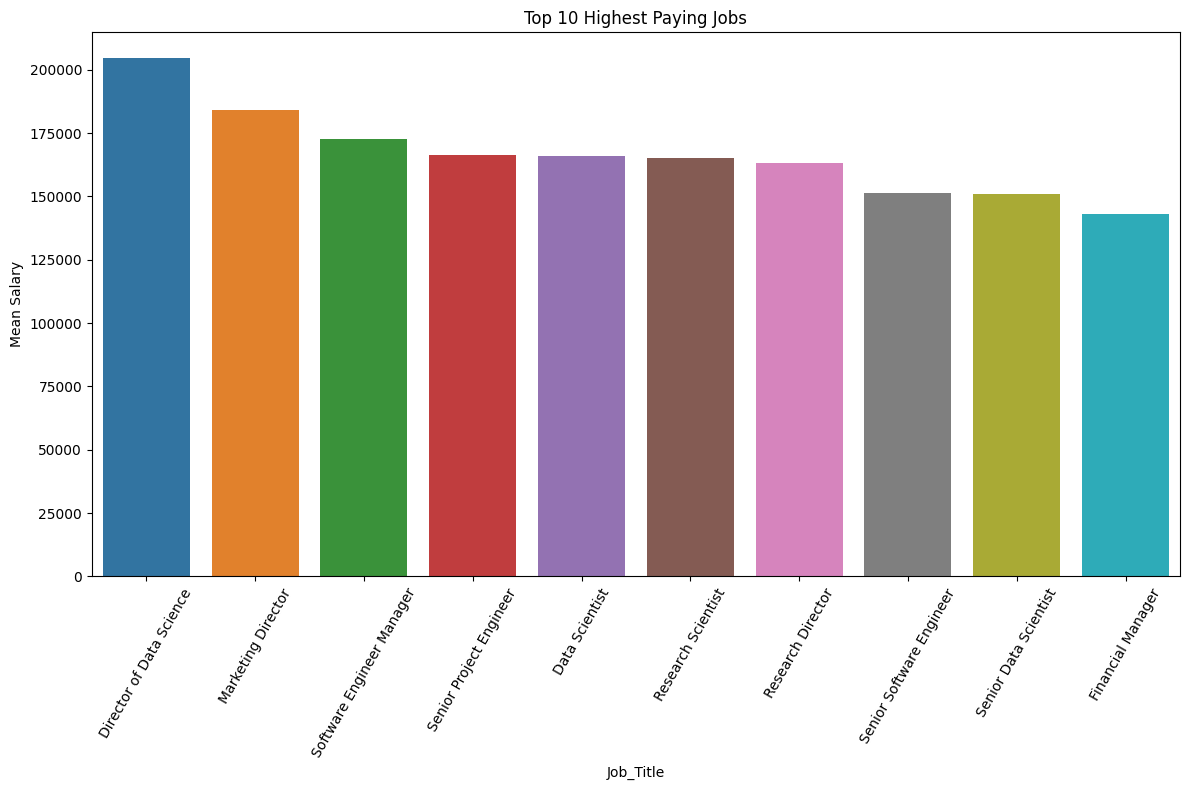

In [20]:
top_10_highest_paying_jobs = df.groupby('Job_Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 8))

# Define a color palette with 10 different colors
colors = sns.color_palette("tab10", 10)  # "tab10" is a qualitative color palette with 10 distinct colors

# Create the bar plot with the custom colors
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values, palette=colors)

# Customize the plot
plt.xlabel('Job_Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

#### **Distribution of continuous variables**


**1. Age Distribution**

**2. Years of Experience Distribution**

**3. Salary Distribution**

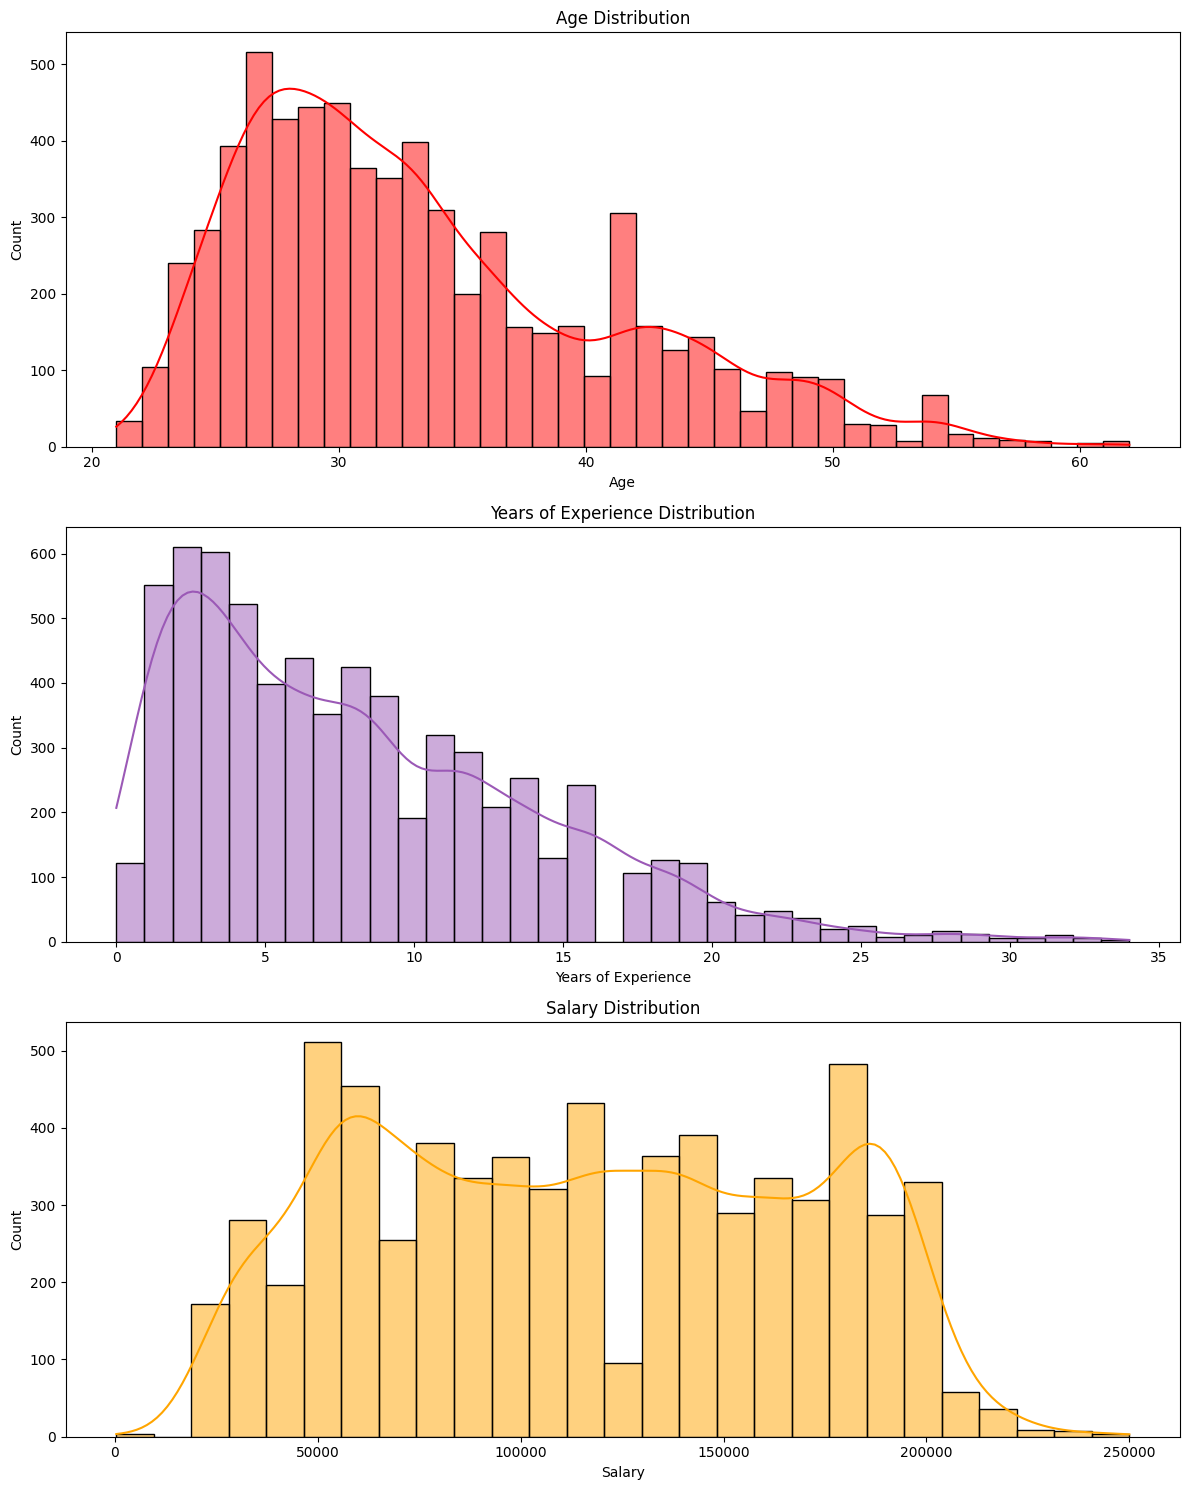

In [21]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], color='red', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Years_of_Experience'], ax=ax[1], color='#9b59b6', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], color='orange', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()

#### **Relationship between discreet variables**
**1. Gender and Salary**

**2. Education Level and Salary**

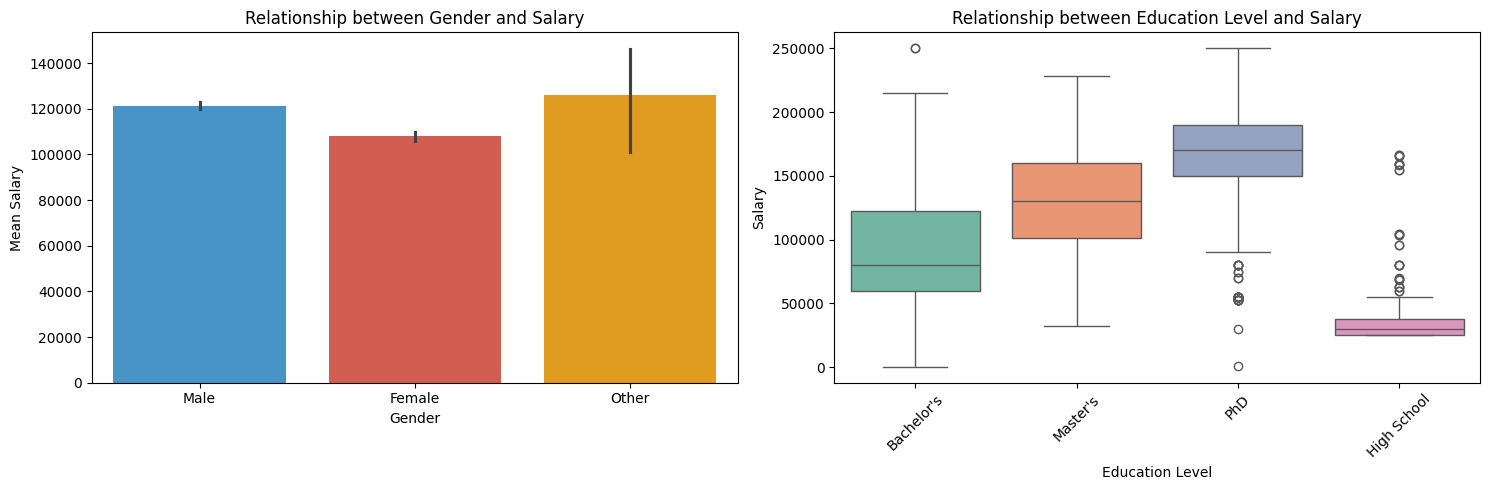

In [22]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

gender_colors = ['#3498db', '#e74c3c', 'orange']
education_colors = sns.color_palette("Set2")

sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0], palette=gender_colors)
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

sns.boxplot(x='Education_Level', y='Salary', data=df, ax=ax[1], palette=education_colors)
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

#### **Relationship between Education Level, Salary and Gender**

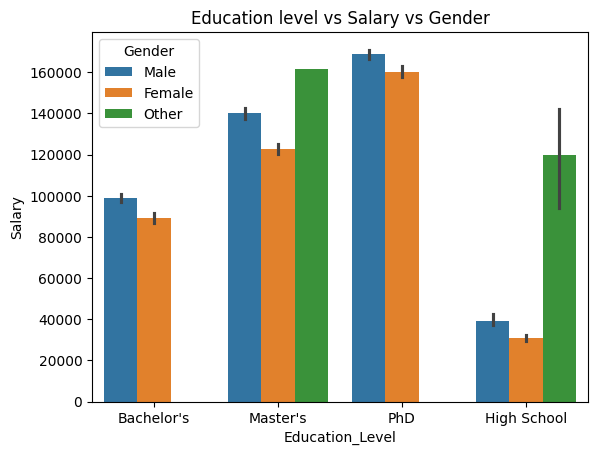

In [23]:
sns.barplot(x='Education_Level',y='Salary',data=df,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

#### **1. Relationship between Age and Salary**

#### **2. Relationship between Experience and Salary**


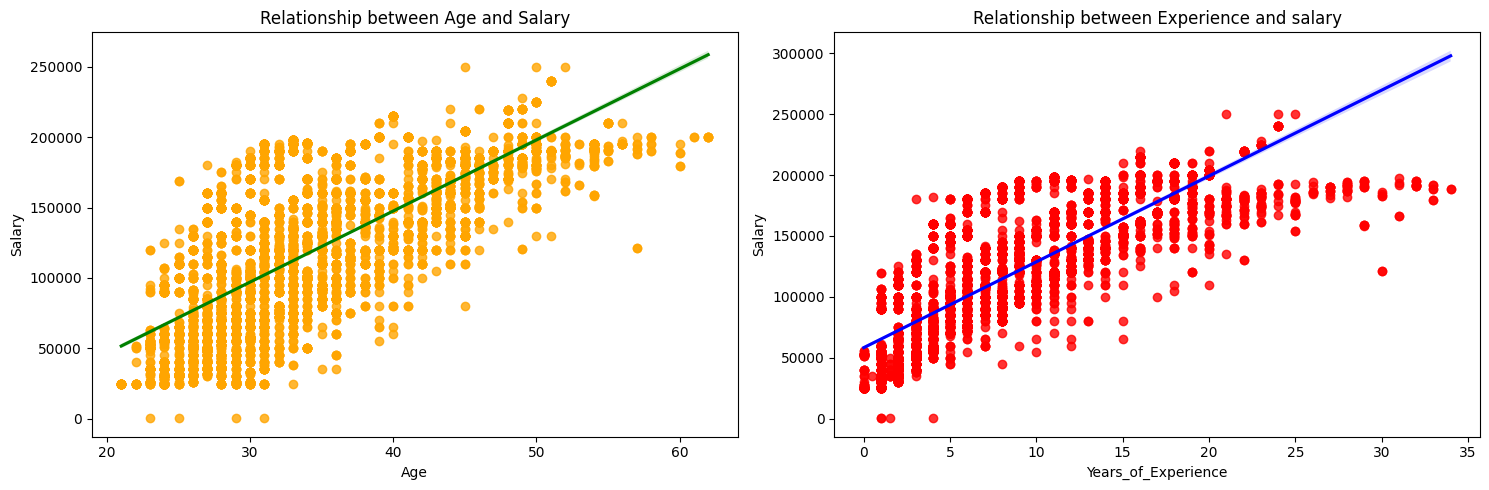

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years_of_Experience',y='Salary',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()

### **Feature Engineering**

In [25]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

IQR = Q3-Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [26]:
df[df.Salary>upper]

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary


In [27]:
df[df.Salary<lower]
df

,Age,Gender,Education_Level,Job_Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Others,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Others,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0


In [28]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()


In [29]:
df['Gender'] = Label_Encoder.fit_transform(df['Gender'])



In [30]:
df['Education_Level'] = Label_Encoder.fit_transform(df['Education_Level'])

In [31]:
df['JobTitle'] = Label_Encoder.fit_transform(df['Job_Title'])

# Drop Job Title column
df.drop('Job_Title',inplace=True,axis=1)
df.head()

,Age,Gender,Education_Level,Years_of_Experience,Salary,JobTitle
0,32.0,1,0,5.0,90000.0,47
1,28.0,0,2,3.0,65000.0,2
2,45.0,1,3,15.0,150000.0,28
3,36.0,0,0,7.0,60000.0,34
4,52.0,1,2,20.0,200000.0,28


In [32]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df.head()

,Age,Gender,Education_Level,Years_of_Experience,Salary,JobTitle
0,32.0,1,0,5.0,90000.0,47
1,28.0,0,2,3.0,65000.0,2
2,45.0,1,3,15.0,150000.0,28
3,36.0,0,0,7.0,60000.0,34
4,52.0,1,2,20.0,200000.0,28


In [33]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()


In [34]:
features = df.drop('Salary',axis=1)

# Series containing target variable to be predicted
target = df['Salary']


### **Splitting the data into Training and Testing:**

In [35]:

# Splitting data into 25% training and 75% test sets

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

(5023, 5)

## **Model development**

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
Linear_regression_model = LinearRegression()

In [38]:
Linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred_lr = Linear_regression_model.predict(x_test)
y_pred_lr

array([128402.97312703,  95243.95945965,  73739.12835905, ...,
        84231.35931852, 178118.94004374, 131327.53904173])

In [40]:
df = pd.DataFrame({'y_Actual' : y_test, 'y_predicted' : y_pred_lr})
df['Error'] = df['y_Actual'] - df['y_predicted']
df['abs_error']  = abs(df['Error'])
Mean_absolute_Error = df['abs_error'].mean()
Mean_absolute_Error

np.float64(23838.118905045274)

In [41]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
r2_score(y_test, y_pred_lr)

0.6765313564187938

In [43]:
print(f'Accuracy of the model = {round(r2_score(y_test, y_pred_lr),4)*100}%')

Accuracy of the model = 67.65%


In [44]:
round(mean_absolute_error(y_test, y_pred_lr),2)


np.float64(23838.12)

In [45]:
print(f'Mean Absolute Error = {round(mean_absolute_error(y_test, y_pred_lr),2)}')

Mean Absolute Error = 23838.12


In [46]:
mse = round(mean_squared_error(y_test, y_pred_lr),2)
mse

np.float64(922299015.42)

In [47]:
print('Root Mean Squared Error (RMSE) = ', mse**(0.5))

Root Mean Squared Error (RMSE) =  30369.376276440053


In [48]:
Linear_regression_model.coef_

array([-1989.77112083,  6135.49443373,  6017.15991645,  8778.34923916,
         -94.51937503])

In [49]:
Linear_regression_model.intercept_

np.float64(102859.77605769696)

### **Customise Preditions:**

In [50]:
df.head()

,y_Actual,y_predicted,Error,abs_error
1883,150000.0,128402.973127,21597.026873,21597.026873
2630,75969.0,95243.959460,-19274.959460,19274.959460
498,100000.0,73739.128359,26260.871641,26260.871641
5973,60000.0,71307.286766,-11307.286766,11307.286766
4108,80000.0,90835.762932,-10835.762932,10835.762932


In [51]:
	#Age	Gender	Education_Level	Years_of_Experience	Salary
Age = 29
Gender = 0
Education_Level = 1
JobTitle = 22
Years_of_Experience = 3

In [52]:
Emp_Salary = Linear_regression_model.predict([[Age, Gender, Education_Level, JobTitle, Years_of_Experience]])
Emp_Salary

array([244013.69860665])

In [53]:
print("Salary of the Employee with above attributes = ", Emp_Salary[0])


Salary of the Employee with above attributes =  244013.6986066548


In [54]:
type(Emp_Salary)

numpy.ndarray

## **Saving Model**

In [55]:
import joblib
joblib.dump(Emp_Salary, 'Employee_salary_predition')

['Employee_salary_predition']